In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
# Read table with (simplified) horizon symbols
path_horizons_simple = '..\\..\\..\\..\\data\\BGR_mini\\Vereinfachung_Horizontsymbole.csv'
df_simple = pd.read_csv(path_horizons_simple)
df_simple.rename(columns={"relevanter Anteil = was sinntragend und detektierbar ist - es sind nicht alles gültige Symbole": "relevanter Anteil"}, inplace=True)
df_simple.head()

,Horiz,Anzahl im Datensatz,relevanter Anteil,stark vereinfacht
0,Ap,1762,Ap,Ap
1,Bv,626,Bv,Bv
2,ilCv,620,ilC,Cv
3,elCv,500,elC,Cv
4,Ah,455,Ah,Ah


In [3]:
# Filter for symbols with at least n samples
df_simple = df_simple[df_simple['Anzahl im Datensatz'] > 10]
unique_labels = df_simple['relevanter Anteil'].unique()
len(unique_labels)

100

In [4]:
# Replace all '+' with '-'
unique_labels = [label.replace('+', '-') if '+' in label else label for label in unique_labels]

# Order in horizon mixtures should not matter
seen = set()
result = []
for label in unique_labels:
    parts = label.split('-')
    key = tuple(sorted(parts)) 

    if key not in seen:
        seen.add(key)
        result.append(label)
unique_labels = result

In [16]:
len(unique_labels)

87

In [23]:
sorted(unique_labels)

['Acp',
 'Acxh',
 'Aeh',
 'Ael',
 'Ael-Bt',
 'Aep',
 'Ah',
 'Ah-Bv',
 'Al',
 'Al-Bt',
 'Al-Bv',
 'Al-Sw',
 'Ap',
 'Axh',
 'Axp',
 'Bcv',
 'Bh',
 'Bhs',
 'Bhv',
 'Bs',
 'Bsh',
 'Bsv',
 'Bt',
 'Bt-Sd',
 'Btv',
 'Bv',
 'Bv-Ael',
 'Bv-Cv',
 'Bv-elC',
 'Bv-ilC',
 'Bvt',
 'C',
 'Cbtv',
 'Cj',
 'Cv',
 'E',
 'Gkso',
 'Go',
 'Go-ilC',
 'Gor',
 'Gr',
 'Gro',
 'Gw',
 'Hr',
 'Hv',
 'Hw',
 'M',
 'M-Go',
 'M-Gro',
 'Mc',
 'P',
 'P-Sd',
 'R',
 'Sd',
 'Sd-Btv',
 'Sd-Bv',
 'Sd-ilC',
 'Sd-lC',
 'Ssw',
 'Sswd',
 'Sw',
 'Sw-Ah',
 'Sw-Ap',
 'Sw-Bt',
 'Sw-Bv',
 'Sw-Go',
 'Sw-M',
 'Sw-ilC',
 'aelC',
 'bE',
 'cC',
 'clC',
 'cmC',
 'elC',
 'elC-P',
 'elCc',
 'emC',
 'iC',
 'ilC',
 'ilCbtv',
 'imC',
 'imCv',
 'lC',
 'mCv',
 'tGo',
 'tGr',
 'tGro']

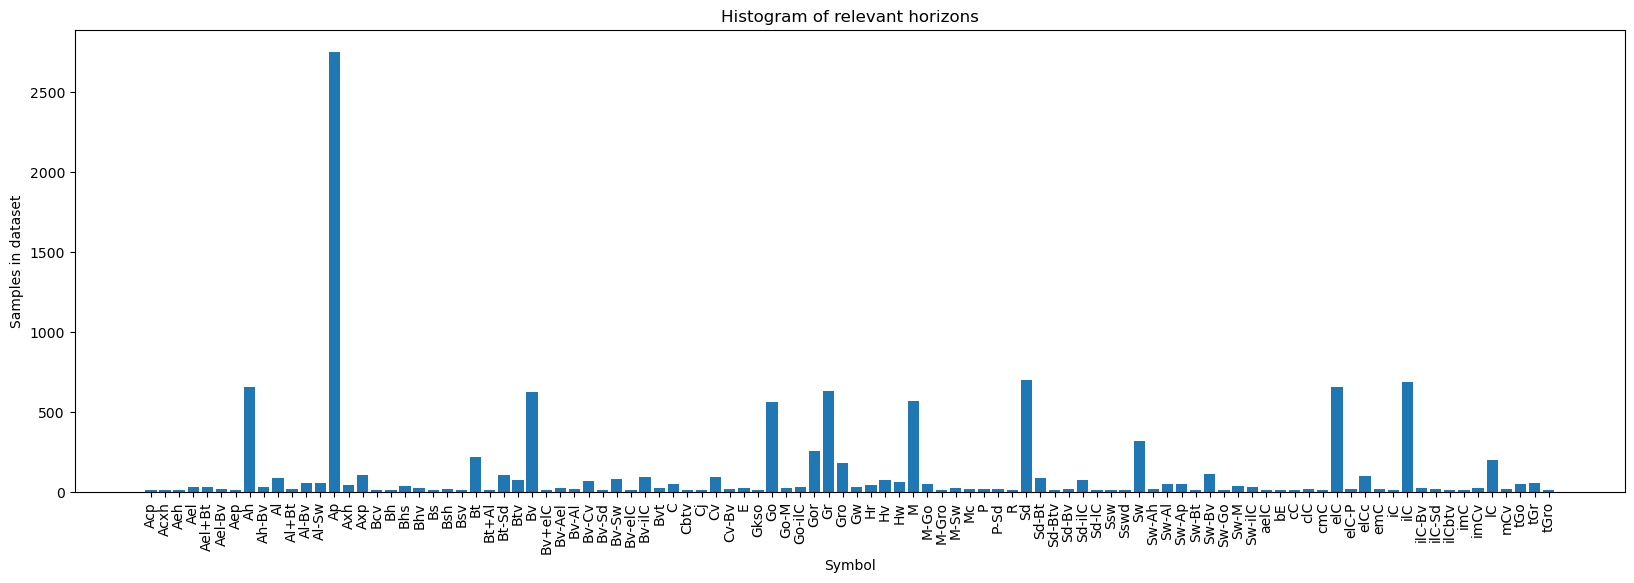

In [17]:
# Histogram of unique labels
label_counts = df_simple.groupby('relevanter Anteil')['Anzahl im Datensatz'].sum()

plt.figure(figsize=(20,6))
plt.bar(label_counts.index, label_counts)
plt.xlabel('Symbol')
plt.ylabel('Samples in dataset')
plt.title('Histogram of relevant horizons')
plt.xticks(rotation=90)
plt.show()

In [5]:
# Define the taxonomy as a graph
taxonomy = nx.DiGraph()

# A Horizons subcategories
a_horizons = ["Ap", "Ah", "Al", "Axp", "Axh", "Acp", "Aep", "Aeh", "Ael", "Acxh"]
for label in a_horizons:
    taxonomy.add_edge("A", label)

# B Horizons subcategories
b_horizons = ["Bv", "Bt", "Bhs", "Bh", "Bs", "Bhv", "Btv", "Bsh", "Bcv", "Bsv", "Bvt"]
for label in b_horizons:
    taxonomy.add_edge("B", label)

# C Horizons subcategories
c_horizons = ["C.", "Cv", "Cbtv", "Cj", "cC", "clC", "iC", "ilC", "lC", "ilCbtv", "elC", "emC", "imC", "mCv", "imCv", "cmC", "elCc", "aelC"]
for label in c_horizons:
    taxonomy.add_edge("C", label)

# E Horizons subcategories
e_horizons = ["E.", "bE"]
for label in e_horizons:
    taxonomy.add_edge("E", label)

# G Horizons subcategories
g_horizons = ["Gr", "Gro", "Gor", "Go", "Gw", "tGo", "tGr", "tGro", "Gkso"]
for label in g_horizons:
    taxonomy.add_edge("G", label)

# H Horizons subcategories
h_horizons = ["Hr", "Hw", "Hv"]
for label in h_horizons:
    taxonomy.add_edge("H", label)

# M Horizons subcategories
m_horizons = ["M.", "Mc"]
for label in m_horizons:
    taxonomy.add_edge("M", label)

# P Horizons subcategories
p_horizons = ["P.", "P-Sd"]
for label in p_horizons:
    taxonomy.add_edge("P", label)

# R Horizon
taxonomy.add_edge("R", "R.")

# S Horizons subcategories
s_horizons = ["Sd", "Sw", "Ssw", "Sswd"]
for label in s_horizons:
    taxonomy.add_edge("S", label)

In [6]:
# Extend graph with mixtures
for lab in unique_labels:
    if '-' in lab:
        print(lab)
        parents = lab.split('-')
        for parent in parents:
            # Two parent nodes for a mixture
            taxonomy.add_edge(parent, lab)
            # Is one of the parents' labels also a terminal node? 
            if parent in unique_labels:
                taxonomy.add_edge(parent, parent + '.')

Sw-Bv
Bv-ilC
Bt-Sd
Bv-Cv
Sd-ilC
Al-Sw
Al-Bv
M-Go
Ael-Bt
Ah-Bv
Sw-M
Sw-Ap
Bv-Ael
Go-ilC
elC-P
Sd-Bv
Sw-ilC
Al-Bt
Sw-Ah
P-Sd
Sd-lC
Sw-Go
Sw-Bt
Sd-Btv
Bv-elC
M-Gro


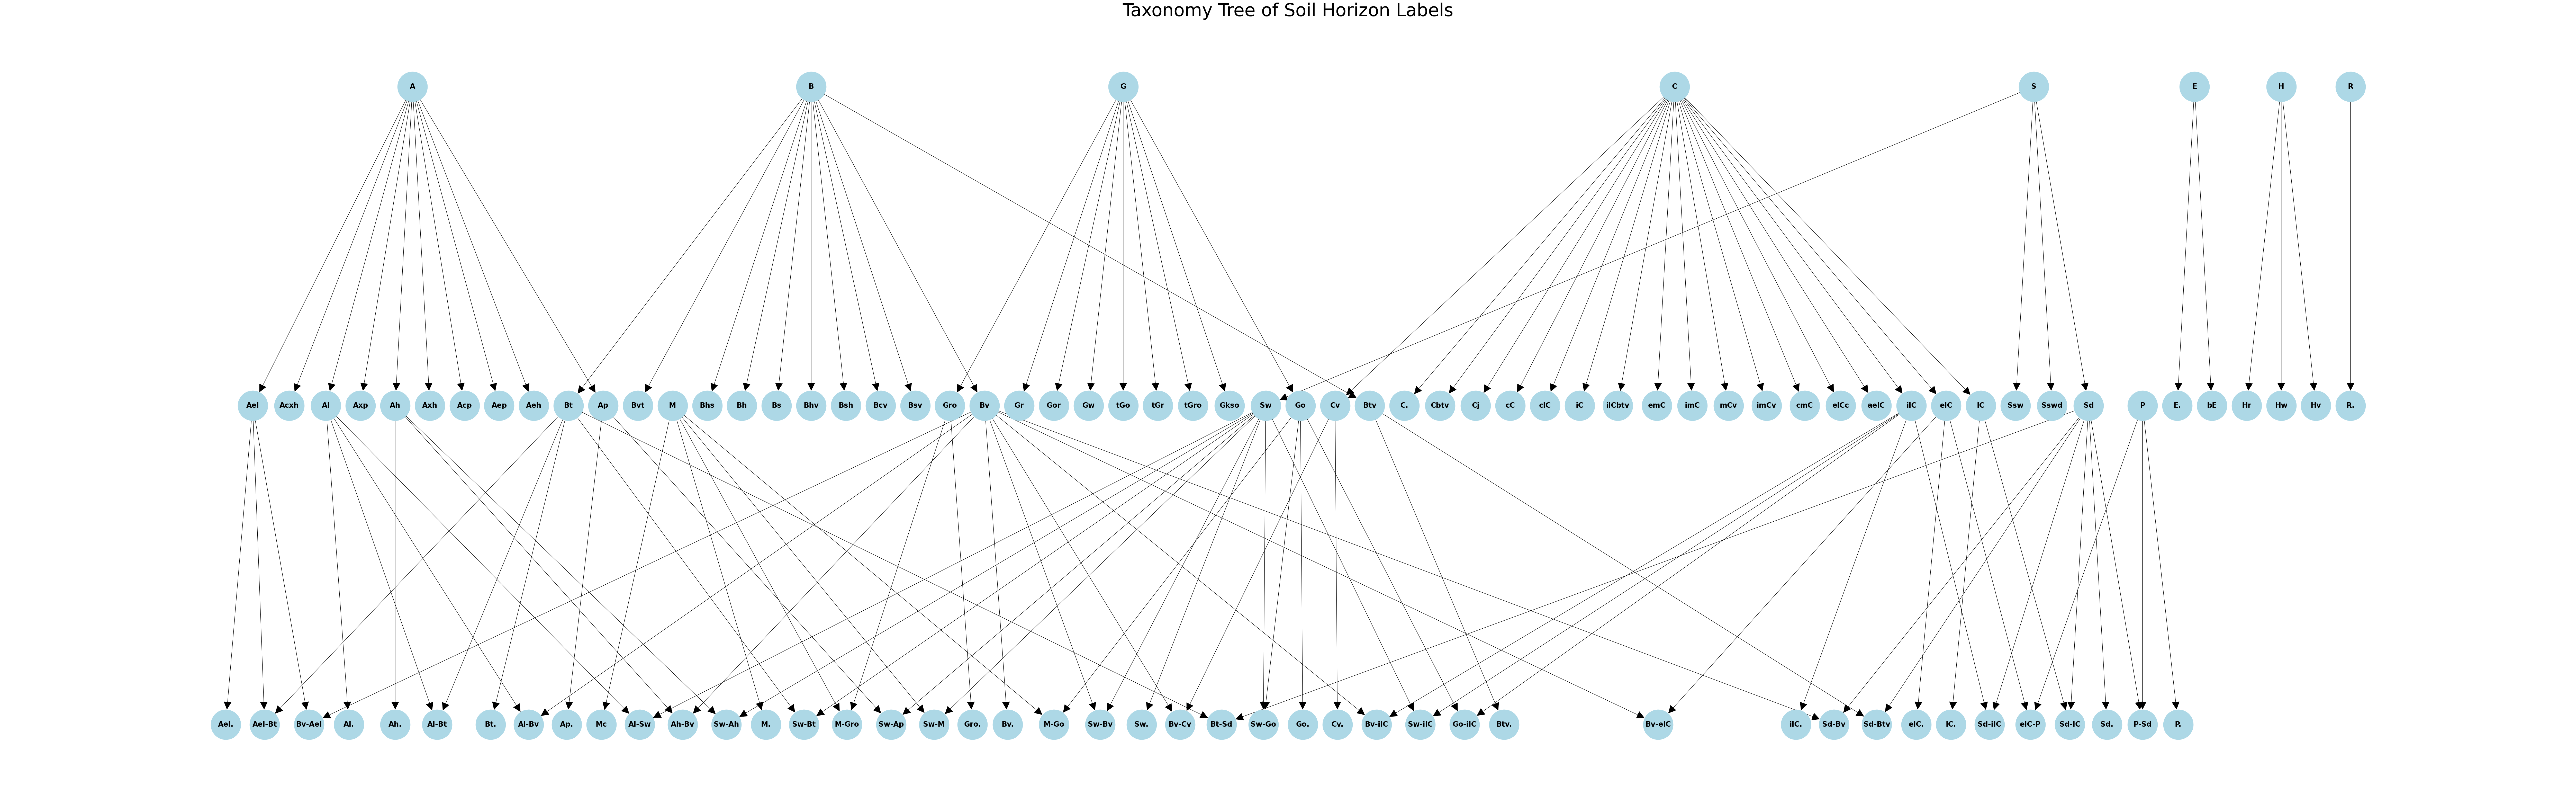

In [23]:
# Note: Bindestrich '-' heißt Übergangshorizont (evtl vermischt vom ersten zum zweiten)
#       Plus '+' heißt Verzahnungshorizont (zwischen dem ersten und dem zweiten, ohne Vermischung)
# ToDo: Bei beiden Zusammensetzungen ist die Reihenfolge relevant, oder?
#
# ToDo: Was tun bei Zusammensetzungen z.B. Aep = Ae + Ap?
#
# ToDo: combine several horizons into a node 'Others'? Such as E, H, P, R
#
# ToDo: Self-reference in nodes avoided by '.' - any better solution?


# Create the plot
fig = plt.figure(figsize=(100, 30))
pos = nx.nx_agraph.graphviz_layout(taxonomy, prog="dot")

# Draw the graph
nx.draw(taxonomy, pos, with_labels=True, arrows=True, node_size=7000, node_color="lightblue", 
        font_size=20, font_weight="bold", arrowsize=50)

plt.title("Taxonomy Tree of Soil Horizon Labels", fontsize=50)
plt.show()
fig.savefig("..\\..\\figures\\horizons_tree.pdf")

In [24]:
# Total number of nodes (counting abstract parent that don't have realizations in the horizon symbols)
len(taxonomy.nodes())

112

In [25]:
# Number of terminal nodes (same as in unique_labels)
len([x for x in taxonomy.nodes() if taxonomy.out_degree(x)==0])

87

In [7]:
# Embed graph into vector space
from node2vec import Node2Vec # current newest version 0.5.0

# Initialize Node2Vec
node2vec = Node2Vec(taxonomy, dimensions=len(unique_labels), walk_length=30, num_walks=200)

Computing transition probabilities:   0%|          | 0/112 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████| 200/200 [00:00<00:00, 1724.11it/s]


In [8]:
# Fit the model and generate embeddings
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [11]:
# Access embeddings for each node
embeddings = {node: model.wv[node] for node in taxonomy.nodes()}

# Example: Get embedding for node 'Al-Bv'
al_bv_embedding = embeddings['Al-Bv']
print("Embedding for 'Al-Bv':", al_bv_embedding)

Embedding for 'Al-Bv': [-1.97571775e-04  1.13223288e-02  1.25711616e-02 -6.97533786e-03
 -3.67697142e-03 -1.52625970e-03 -7.98123330e-03  1.15078446e-02
 -8.06752127e-03 -2.17696695e-04 -5.36154537e-03  6.73442194e-03
 -1.92044303e-03 -1.52796339e-02  3.48062231e-03  1.04678916e-02
  1.20763158e-04 -1.25187151e-02 -5.15602482e-03  3.60296085e-03
 -1.52307171e-02  1.41709363e-02 -1.76484436e-02 -9.78012383e-03
 -5.67533681e-03 -7.51660299e-03  8.29669647e-03  1.81578621e-02
  5.81518048e-03  1.19468465e-03  6.46092370e-03  5.04809385e-03
 -6.19204366e-04 -1.38531839e-02  4.17881319e-03  2.94855074e-03
 -6.49892911e-03 -1.32304449e-02  7.52122214e-05 -8.56804848e-03
  5.15882485e-03  1.42888455e-02  5.28761605e-03  7.72254635e-03
  1.04562789e-02  1.69364724e-03 -7.40243215e-03  5.15716420e-06
  5.84884966e-03 -1.10156825e-02  6.84917066e-03  1.24100186e-02
 -5.26515592e-04  3.43416538e-03 -2.47381022e-03 -1.67806987e-02
 -2.13108887e-03 -6.61274360e-04  4.77569317e-03 -6.05660258e-03
 -

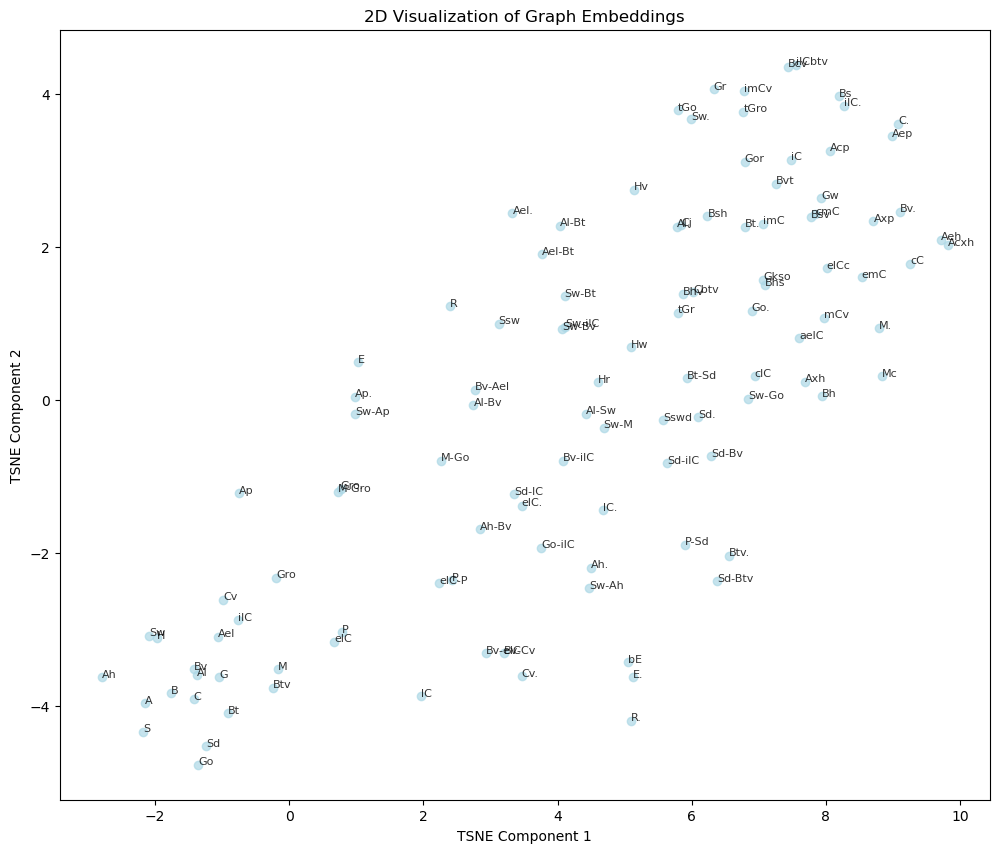

In [15]:
from sklearn.manifold import TSNE
import numpy as np

# Extract embeddings and corresponding labels
nodes = list(taxonomy.nodes())
embeddings = np.asarray([model.wv[node] for node in nodes])

# Reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(12, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, c="lightblue")

# Annotate each point with its label
for i, label in enumerate(nodes):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label, fontsize=8, alpha=0.8)
plt.title("2D Visualization of Graph Embeddings")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()